In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.cluster import DBSCAN

import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

In [7]:
df = pd.read_csv("tsne_run_all_20220207.csv", index_col=0)

In [8]:
df.head()

,vis_x,vis_y
0,1.618084,29.688417
1,7.197097,19.633870
2,-19.457193,-25.514130
3,15.406835,-35.878690
4,42.199844,-17.131584


In [9]:
dbscan = DBSCAN()

In [13]:
dbscan.fit(df[["vis_x","vis_y"]]) #unopitmised 

DBSCAN()

In [14]:
df['DBSCAN_labels']=dbscan.labels_

In [21]:
distance_table = df[["vis_x","vis_y"]]

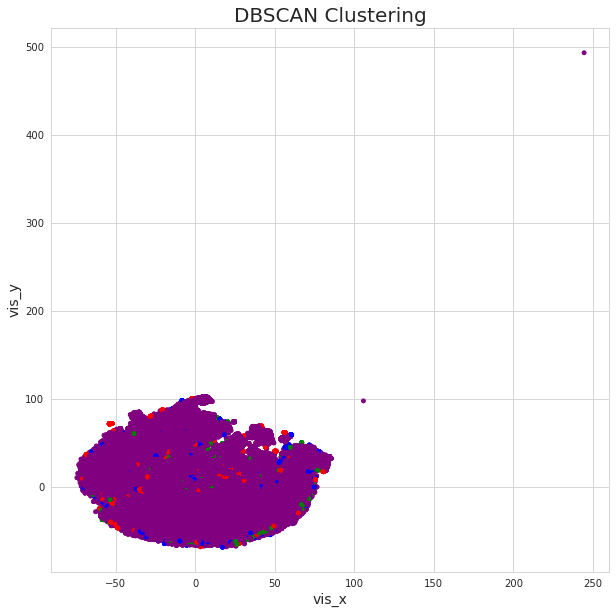

In [19]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df["vis_x"],df["vis_y"],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.show()

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(distance_table)
distances, indices = nbrs.kneighbors(distance_table)

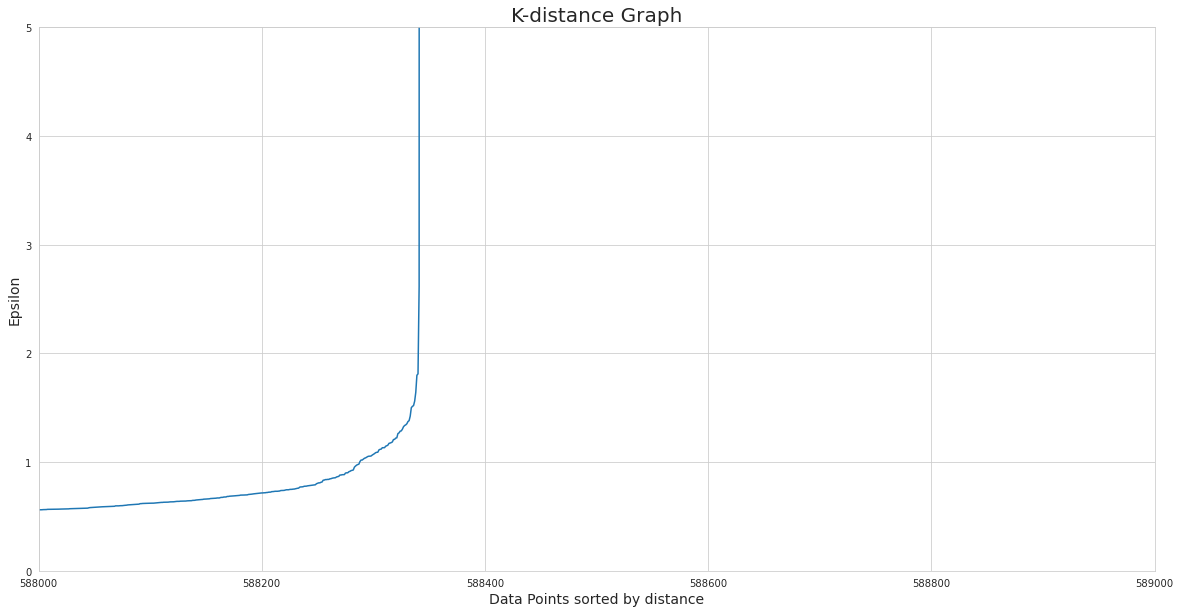

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([588000,589000])
plt.ylim([0,5])
plt.show()

In [ ]:
#eps = 1?
#min points = 8 ?

In [35]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=1,min_samples=8)
dbscan_opt.fit(distance_table)

DBSCAN(eps=1, min_samples=8)

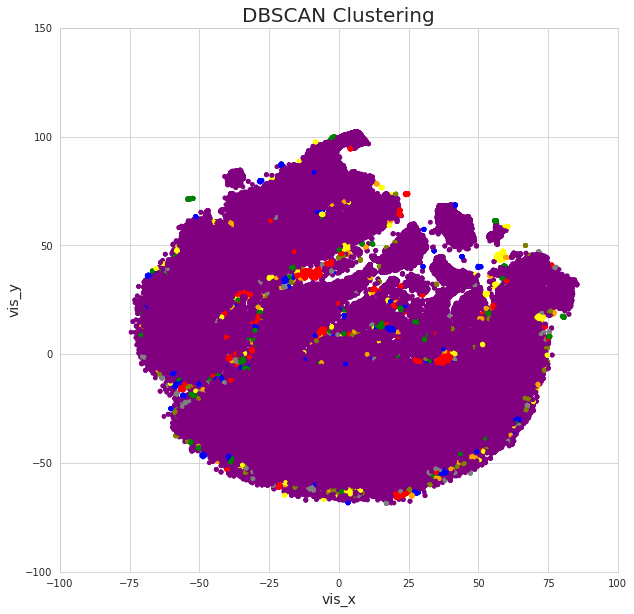

In [37]:
# Plotting resulting clusters
colors=['purple','red','blue','green', 'yellow', 'gray', 'orange', 'olive']
plt.figure(figsize=(10,10))
plt.scatter(df["vis_x"],df["vis_y"],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.xlim([-100,100])
plt.ylim([-100,150])
plt.show()